In [113]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
Bike_sharing=pd.read_csv('day.csv')
Bike_sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
Bike_sharing.shape

(730, 16)

In [4]:
Bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
Bike_sharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
# Dropping the columns as year and month is already there in dteday column, hence 'yr' and 'mnth' is not required.
Bike_sharing.drop(['yr','mnth'],axis=1,inplace=True)
Bike_sharing.head()

,instant,dteday,season,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [7]:
Bike_sharing.drop(['holiday'],axis=1,inplace=True)
Bike_sharing.head()

,instant,dteday,season,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [8]:
# separating the month and year from the variable dteday
Bike_sharing['year']=pd.DatetimeIndex(Bike_sharing['dteday']).year
Bike_sharing['month']=pd.DatetimeIndex(Bike_sharing['dteday']).month
Bike_sharing.head()

,instant,dteday,season,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year,month
0,1,01-01-2018,1,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985,2018,1
1,2,02-01-2018,1,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801,2018,2
2,3,03-01-2018,1,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2018,3
3,4,04-01-2018,1,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,2018,4
4,5,05-01-2018,1,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,2018,5


In [9]:
Bike_sharing.drop(['dteday'], axis=1,inplace=True)
Bike_sharing.head()

,instant,season,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year,month
0,1,1,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985,2018,1
1,2,1,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801,2018,2
2,3,1,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2018,3
3,4,1,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,2018,4
4,5,1,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,2018,5


In [10]:
#changing the seasons variables to labels

season_variables={1:'spring',2:'summer',3:'rainfall',4:'winter'}
Bike_sharing['season'] = Bike_sharing['season'].map(season_variables)

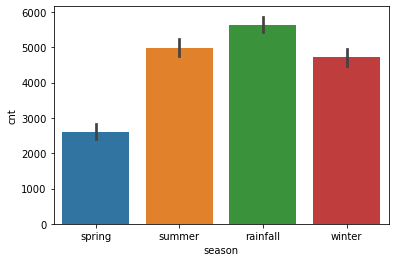

In [11]:
#seasons:
sns.barplot('season','cnt',data=Bike_sharing)
plt.show()
#Bike Rentals are more during the rainfall season.

In [12]:
#weathersit
weather_coding={1:'Clear',2:'Mist',3:'Snow',4:'Rain'}
Bike_sharing['weathersit'] = Bike_sharing['weathersit'].map(weather_coding)

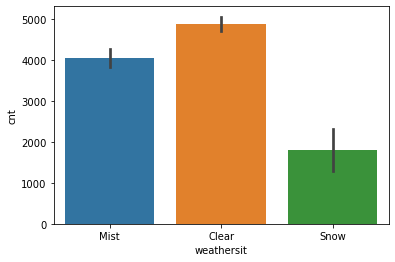

In [13]:
sns.barplot('weathersit','cnt',data=Bike_sharing)
plt.show()

#Bike Rented more during the clear weather conditions.

In [14]:
# Working days
working_days={1:'working_day',0:'Holiday'}
Bike_sharing['workingday'] = Bike_sharing['workingday'].map(working_days)

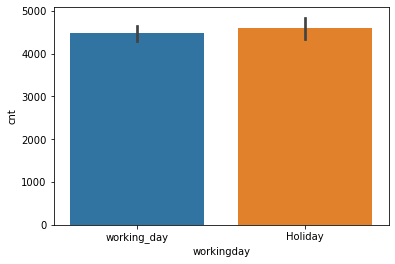

In [15]:
sns.barplot('workingday','cnt',data=Bike_sharing)
plt.show()

#Bikes seems to be rented more on Holidays compared to working days.

In [16]:
# evaluation of bike renting based on year
years={2018:0,2019:1}
Bike_sharing['year'] = Bike_sharing['year'].map(years)

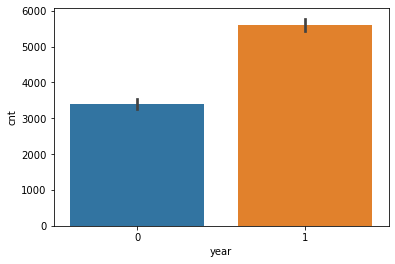

In [17]:
sns.barplot('year','cnt',data=Bike_sharing)
plt.show()

#Bikes rentals increased more in 2019 compared to 2019.

In [18]:
# evaluation of bike renting based on month
months = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
Bike_sharing['month'] = Bike_sharing['month'].map(months)

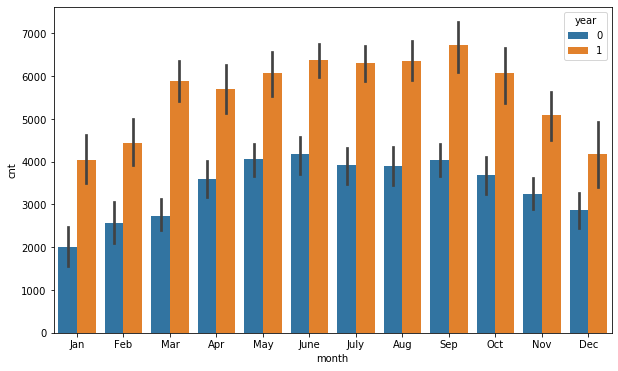

In [19]:
plt.figure(figsize=(10,6))
sns.barplot('month','cnt',hue='year',data=Bike_sharing)
plt.show()
#Bikes rentals more in the month of september compared to rest of the months

In [20]:
week_days = {1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat',7:'sun'}
Bike_sharing['weekday'] = Bike_sharing['weekday'].map(week_days)

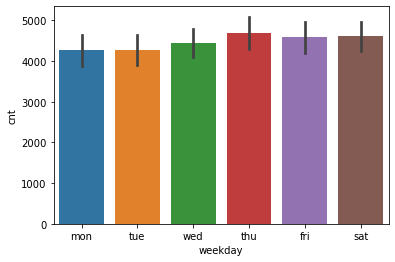

In [21]:
sns.barplot('weekday','cnt',data=Bike_sharing)
plt.show()
#Bikes rentals maximum on thursdays

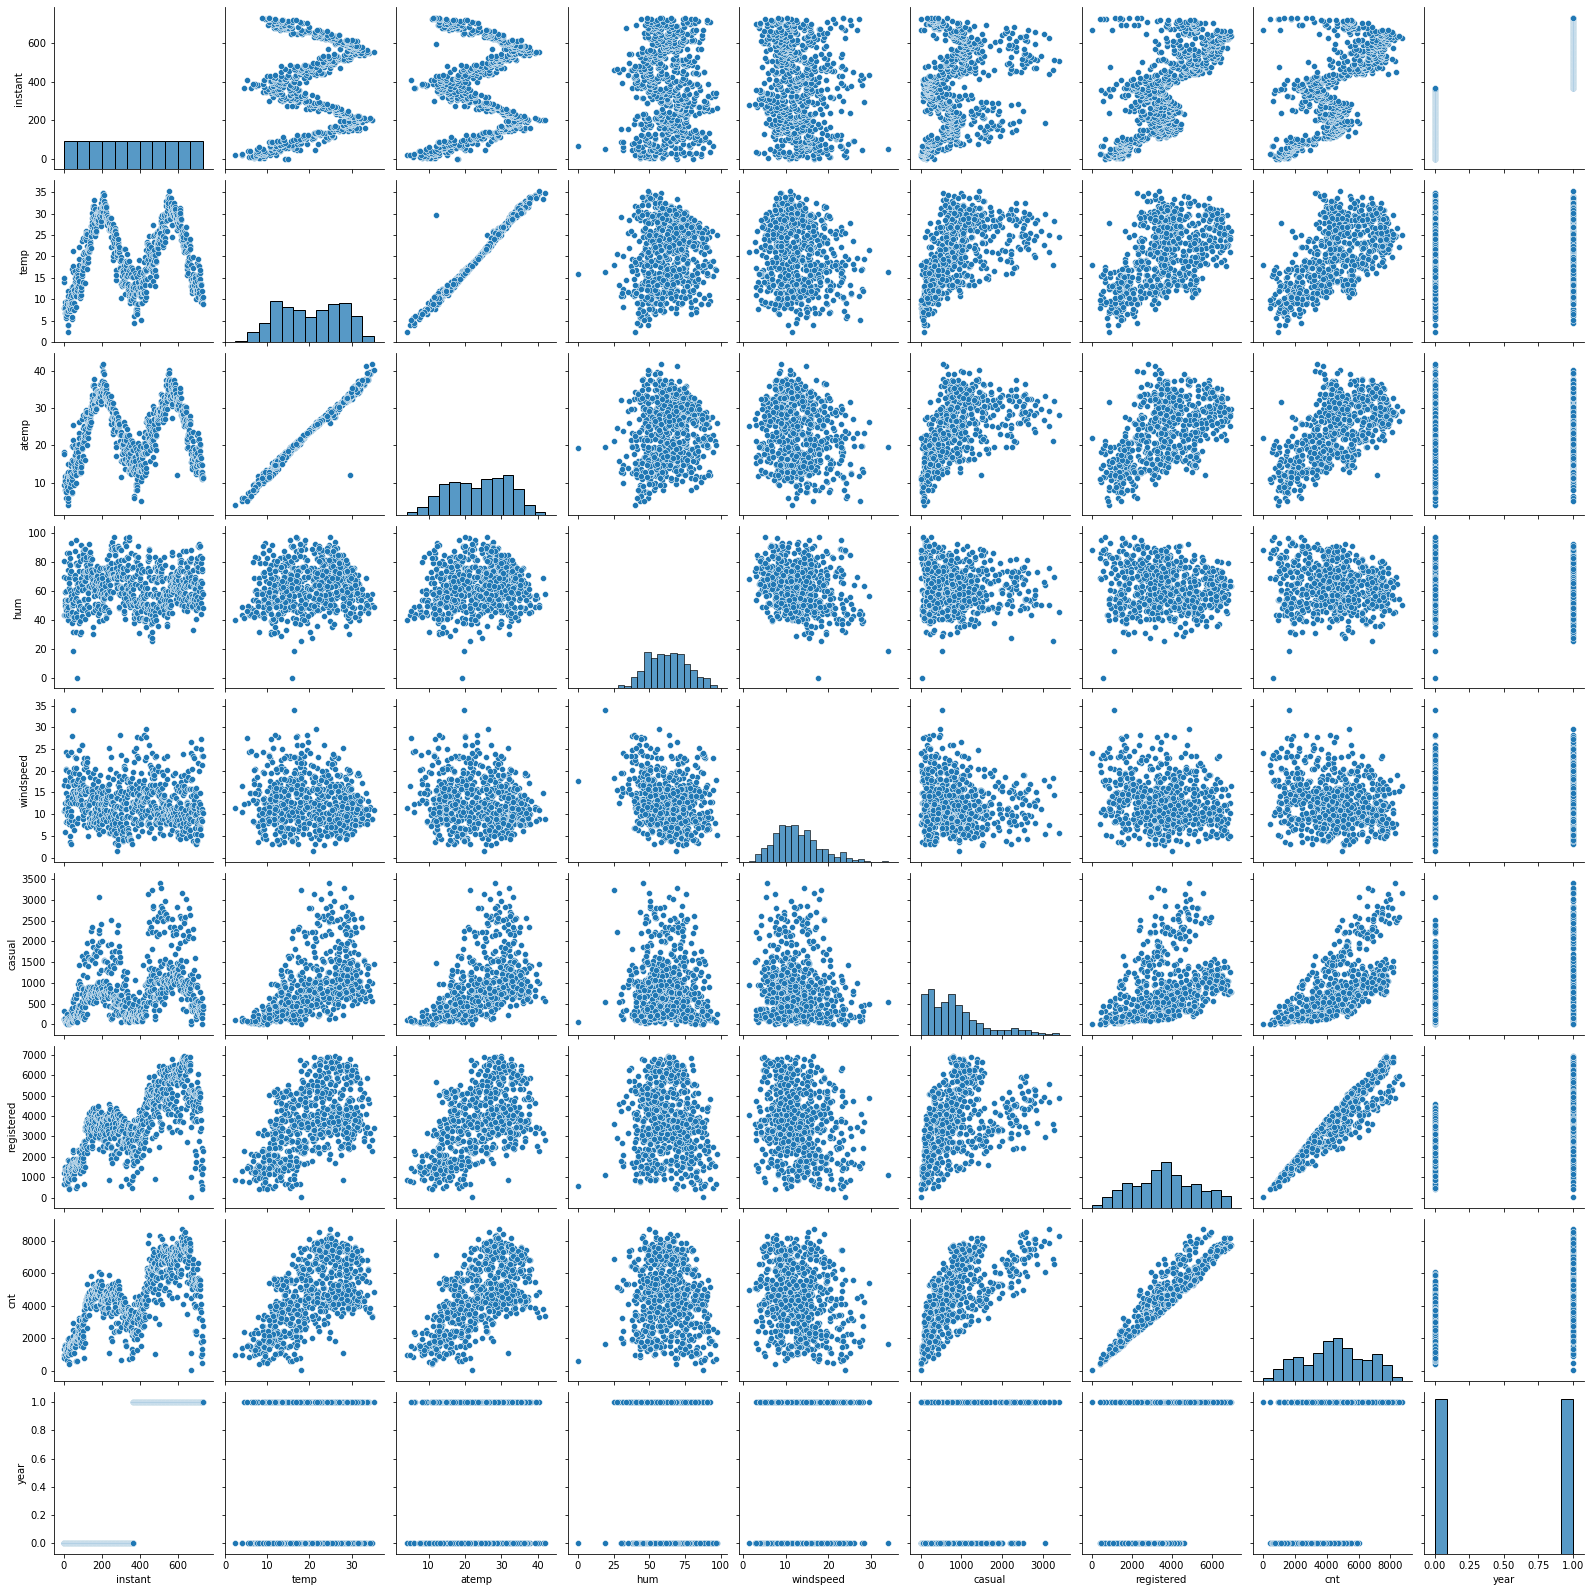

In [22]:
#Visualization of relation ship with different variables
sns.pairplot (Bike_sharing)

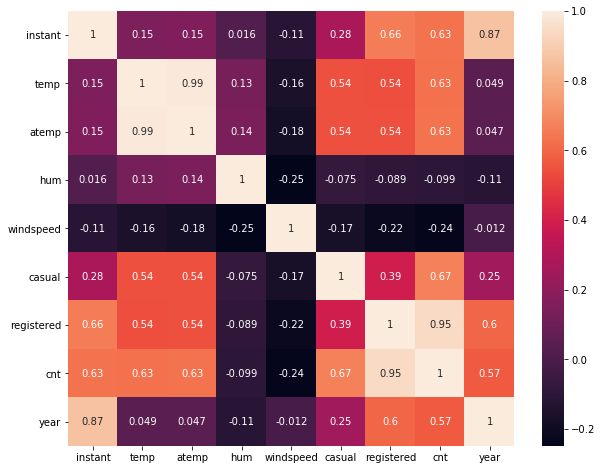

In [23]:
plt.figure (figsize=(10,8))
sns.heatmap(Bike_sharing.corr(), annot=True)


In [24]:
# atemp and temp are highly correlated and one variable can be dropped to avoid multicollinearity.
#dealing with categorical variables
Bike_sharing.drop('atemp', axis=1, inplace=True)
Bike_sharing.head(7)

,instant,season,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt,year,month
0,1,spring,mon,working_day,Mist,14.110847,80.5833,10.749882,331,654,985,0,Jan
1,2,spring,tue,working_day,Mist,14.902598,69.6087,16.652113,131,670,801,0,Feb
2,3,spring,wed,working_day,Clear,8.050924,43.7273,16.636703,120,1229,1349,0,Mar
3,4,spring,thu,working_day,Clear,8.200000,59.0435,10.739832,108,1454,1562,0,Apr
4,5,spring,fri,working_day,Clear,9.305237,43.6957,12.522300,82,1518,1600,0,May
5,6,spring,sat,Holiday,Clear,8.378268,51.8261,6.000868,88,1518,1606,0,June
6,7,spring,NaN,Holiday,Mist,8.057402,49.8696,11.304642,148,1362,1510,0,July


In [25]:
# Handling of categorical variables & #Creating dummy variables
seasons = pd.get_dummies(Bike_sharing['season'])
seasons.head()

,rainfall,spring,summer,winter
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


In [26]:
#Creating dummy variables
week_days = pd.get_dummies(Bike_sharing['weekday'])
week_days.head()

,fri,mon,sat,thu,tue,wed
0,0,1,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,0,1
3,0,0,0,1,0,0
4,1,0,0,0,0,0


In [27]:
#Creating dummy variables
working_day = pd.get_dummies(Bike_sharing['workingday'])
working_day.head()

,Holiday,working_day
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [28]:
#Creating dummy variables
weather = pd.get_dummies(Bike_sharing['weathersit'])
weather.head()

,Clear,Mist,Snow
0,0,1,0
1,0,1,0
2,1,0,0
3,1,0,0
4,1,0,0


In [29]:
#Creating dummy variables
months = pd.get_dummies(Bike_sharing['month'])
months.head()

,Apr,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0


In [30]:
Bike_sharing=pd.concat([Bike_sharing, seasons, week_days, weather, months], axis=1)

Bike_sharing.head()

,instant,season,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,...,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
0,1,spring,mon,working_day,Mist,14.110847,80.5833,10.749882,331,654,...,0,0,1,0,0,0,0,0,0,0
1,2,spring,tue,working_day,Mist,14.902598,69.6087,16.652113,131,670,...,0,1,0,0,0,0,0,0,0,0
2,3,spring,wed,working_day,Clear,8.050924,43.7273,16.636703,120,1229,...,0,0,0,0,0,1,0,0,0,0
3,4,spring,thu,working_day,Clear,8.200000,59.0435,10.739832,108,1454,...,0,0,0,0,0,0,0,0,0,0
4,5,spring,fri,working_day,Clear,9.305237,43.6957,12.522300,82,1518,...,0,0,0,0,0,0,1,0,0,0


In [31]:
#Dropping of encoded categorical variables 

Bike_sharing.drop(['season', 'weekday', 'workingday','weathersit', 'month'], axis=1, inplace=True)
Bike_sharing.head()

,instant,temp,hum,windspeed,casual,registered,cnt,year,rainfall,spring,...,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
0,1,14.110847,80.5833,10.749882,331,654,985,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,2,14.902598,69.6087,16.652113,131,670,801,0,0,1,...,0,1,0,0,0,0,0,0,0,0
2,3,8.050924,43.7273,16.636703,120,1229,1349,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,4,8.200000,59.0435,10.739832,108,1454,1562,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,9.305237,43.6957,12.522300,82,1518,1600,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [32]:
#splitting the data into training and testing sets
x_train, y_test=train_test_split(Bike_sharing, train_size=0.7, random_state=100)
print(df_train.shape)
print(df_test.shape)

NameError: name 'df_train' is not defined

In [33]:
#Rescaling the features
scaler=MinMaxScaler()

In [34]:
#creating a list of numeric variables
num_vars= ['instant', 'temp']

x_train[num_vars]=scaler.fit_transform (x_train[num_vars])
x_train.head()

,instant,temp,hum,windspeed,casual,registered,cnt,year,rainfall,spring,...,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
576,0.791209,0.815169,70.4167,11.083475,968,6248,7216,1,1,0,...,0,0,0,1,0,0,0,0,0,0
426,0.585165,0.442393,62.1250,10.792293,956,3110,4066,1,0,1,...,0,0,0,0,0,1,0,0,0,0
728,1.000000,0.245101,48.3333,23.500518,364,1432,1796,1,0,1,...,1,0,0,0,0,0,0,0,0,0
482,0.662088,0.395666,48.9583,8.708325,1120,3100,4220,1,0,0,...,0,0,0,0,0,0,0,0,0,0
111,0.152473,0.345824,72.9583,14.707907,177,1506,1683,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
x_train[num_vars].describe()

,instant,temp
count,510.000000,510.000000
mean,0.505055,0.537440
std,0.287907,0.225858
min,0.000000,0.000000
25%,0.255838,0.339853
50%,0.510989,0.542596
75%,0.757898,0.735215
max,1.000000,1.000000


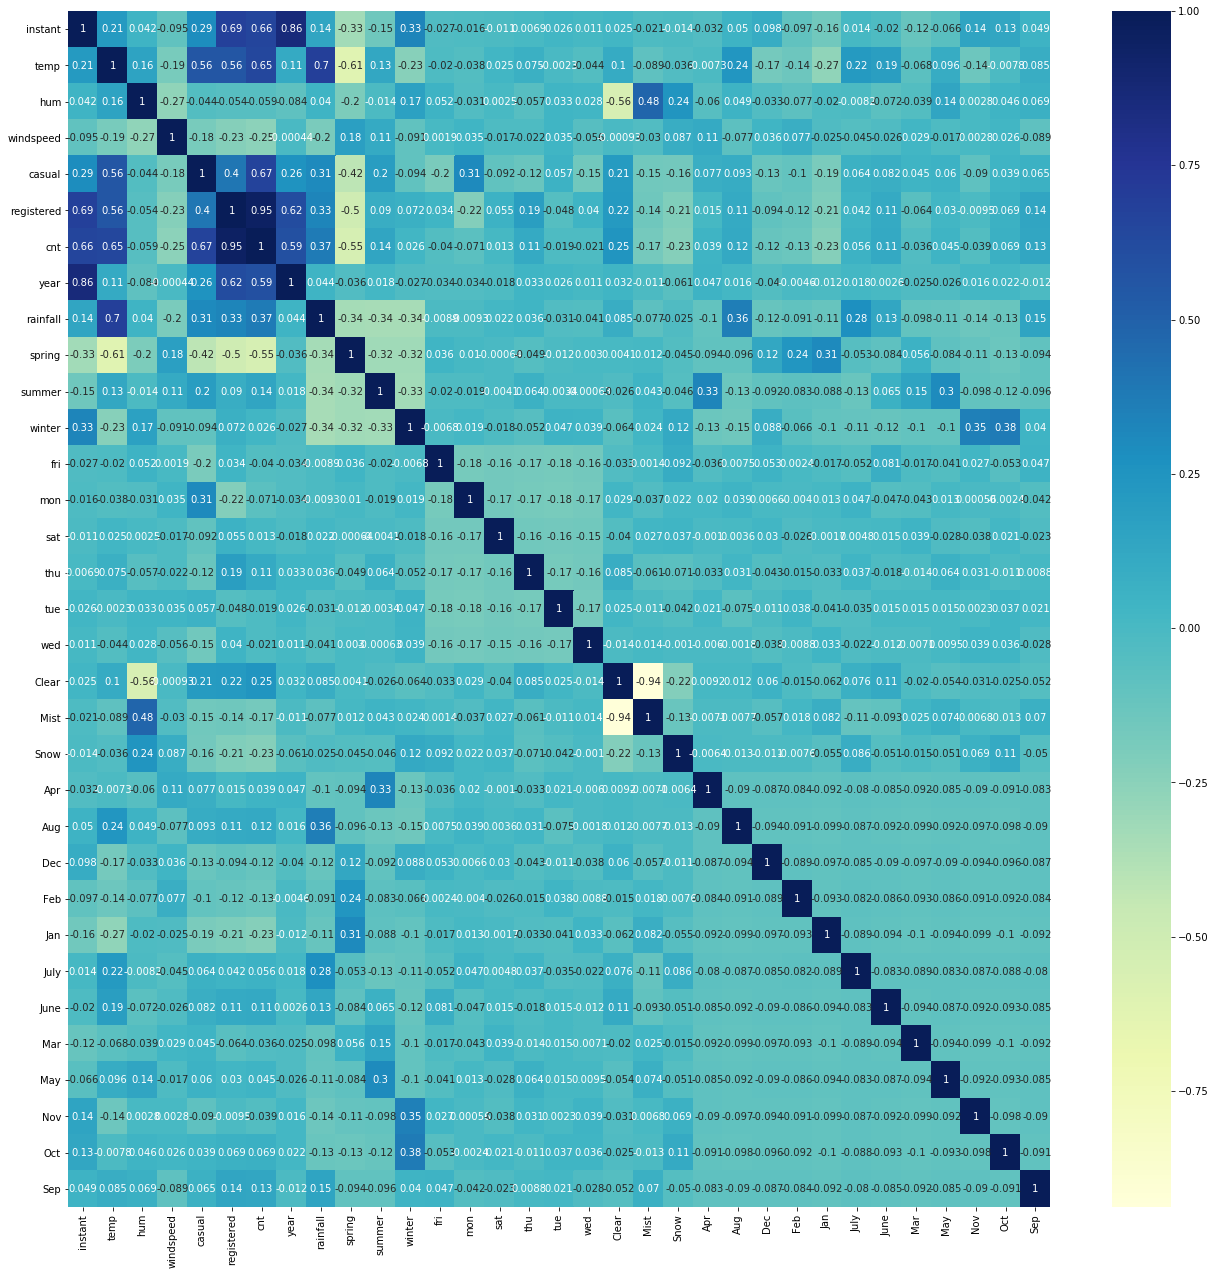

In [41]:
plt.figure(figsize=(22, 22))
sns.heatmap(x_train.corr(), annot=True, cmap="YlGnBu")
plt.show()

In [44]:
#Training the model
#x_train, y_train
y_train=x_train.pop('cnt')
x_train=x_train


In [45]:
#add a constant
x_train_sm= x_train[['instant', 'temp']]
x_train_sm=sm.add_constant(x_train_sm)
#create first model
lr=sm.OLS(y_train, x_train_sm)
# Fit
lr_model=lr.fit()
#params
lr_model.params

const       170.367418
instant    3688.464374
temp       4562.542439
dtype: float64

In [46]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     588.2
Date:                Mon, 10 May 2021   Prob (F-statistic):          7.64e-133
Time:                        15:01:40   Log-Likelihood:                -4280.9
No. Observations:                 510   AIC:                             8568.
Df Residuals:                     507   BIC:                             8580.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        170.3674    136.823      1.245      0.214     -98.443     439.178
instant     3688.4644    169.071     21.816      0.000    3356.298    4020.631
temp        4562.5424    215.520     21.170      0.000    4139.121    4985.964
==============================================================================
Omnibus:                       82.343   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              177.000
Skew:                          -0.874   Prob(JB):                     3.67e-39
Kurtosis:                       5.297   Cond. No.                         6.35
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [87]:
vif=pd.DataFrame()
vif['Features']=x.columns
vif['VIF']=[variance_inflation_factor(x.values,i) for i in range (x.shape[1])]
vif['VIF']=round (vif['VIF'],2)
vif=vif.sort_values (by='VIF', ascending=False)
vif

NameError: name 'x' is not defined

In [49]:
#Residual analysis
y_train_pred=lr_model.predict (x_train_sm)
y_train_pred

576    6807.953982
426    4347.164051
728    4977.115944
482    4417.698885
111    2310.594620
          ...     
578    7040.757468
53     1363.350315
350    3076.164629
79     2681.549637
520    5543.537258
Length: 510, dtype: float64

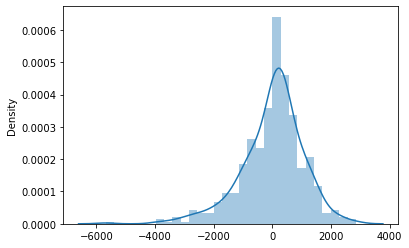

In [50]:
res=y_train-y_train_pred
sns.distplot (res)

In [59]:
#Predictions and evaluations on the test sets
#Create a list of numeric vars
num_vars= ['instant', 'temp']

#3. fit on data--fit() learns xmin, xmax #4. transform: (x-xmin)/(xmax-xmin)
y_test[num_vars]=scaler.transform (y_test[num_vars])
y_test.head()

,instant,temp,hum,windspeed,casual,registered,cnt,year,rainfall,spring,...,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
184,0.252747,0.831783,63.7917,5.459106,3065,2978,6043,0,1,0,...,0,0,0,0,0,0,0,0,0,0
535,0.734890,0.901354,59.2083,7.625404,872,5339,6211,1,0,0,...,0,0,0,0,1,0,0,0,0,0
299,0.410714,0.511964,81.2917,13.250121,240,2419,2659,0,0,0,...,0,0,0,0,0,0,0,0,1,0
221,0.303571,0.881625,42.4167,13.417286,884,3896,4780,0,1,0,...,0,0,0,0,0,0,0,0,1,0
152,0.208791,0.817246,30.5000,19.583229,736,4232,4968,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [61]:
y_test.describe()

,instant,temp,hum,windspeed,casual,registered,cnt,year,rainfall,spring,...,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.490559,0.558718,61.934025,12.598352,876.177273,3684.381818,4560.559091,0.481818,0.245455,0.254545,...,0.086364,0.072727,0.068182,0.113636,0.086364,0.068182,0.095455,0.068182,0.072727,0.095455
std,0.294116,0.233187,14.429542,4.973534,711.161138,1518.870624,1904.968544,0.500809,0.431338,0.436599,...,0.281541,0.260281,0.252632,0.318093,0.281541,0.252632,0.294512,0.252632,0.260281,0.294512
min,0.004121,0.046591,25.416700,1.500244,9.000000,432.000000,441.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.234203,0.355429,51.354200,9.031466,338.250000,2507.750000,3312.750000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.480082,0.558172,60.708350,12.188004,741.000000,3674.000000,4582.500000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.740041,0.755981,72.179375,15.385361,1189.000000,4640.250000,5913.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.001374,0.984424,97.250000,27.999836,3410.000000,6844.000000,8395.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [66]:
#add a constant
y_test_sm=sm.add_constant(y_test)
y_test_sm.head()


,const,instant,temp,hum,windspeed,casual,registered,cnt,year,rainfall,...,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
184,1.0,0.252747,0.831783,63.7917,5.459106,3065,2978,6043,0,1,...,0,0,0,0,0,0,0,0,0,0
535,1.0,0.734890,0.901354,59.2083,7.625404,872,5339,6211,1,0,...,0,0,0,0,1,0,0,0,0,0
299,1.0,0.410714,0.511964,81.2917,13.250121,240,2419,2659,0,0,...,0,0,0,0,0,0,0,0,1,0
221,1.0,0.303571,0.881625,42.4167,13.417286,884,3896,4780,0,1,...,0,0,0,0,0,0,0,0,1,0
152,1.0,0.208791,0.817246,30.5000,19.583229,736,4232,4968,0,0,...,0,1,0,0,0,0,0,0,0,0


In [97]:
#Running RFE with the output number of the variable equal to 10
lm=LinearRegression()
lm.fit(x_train, y_train)
rfe=RFE (lm, 10)
rfe=rfe.fit(x_train, y_train)

In [98]:
list (zip(x_train.columns,rfe.support_,rfe.ranking_))

[('instant', True, 1),
 ('temp', True, 1),
 ('hum', False, 21),
 ('windspeed', False, 20),
 ('casual', True, 1),
 ('registered', True, 1),
 ('year', True, 1),
 ('rainfall', True, 1),
 ('spring', True, 1),
 ('summer', False, 7),
 ('winter', False, 14),
 ('fri', False, 11),
 ('mon', False, 5),
 ('sat', False, 23),
 ('thu', False, 13),
 ('tue', False, 6),
 ('wed', False, 4),
 ('Clear', False, 2),
 ('Mist', False, 3),
 ('Snow', False, 19),
 ('Apr', True, 1),
 ('Aug', False, 12),
 ('Dec', False, 17),
 ('Feb', False, 8),
 ('Jan', False, 9),
 ('July', True, 1),
 ('June', False, 18),
 ('Mar', True, 1),
 ('May', False, 22),
 ('Nov', False, 10),
 ('Oct', False, 16),
 ('Sep', False, 15)]

In [99]:
col=x_train.columns[rfe.support_]
col

Index(['instant', 'temp', 'casual', 'registered', 'year', 'rainfall', 'spring',
       'Apr', 'July', 'Mar'],
      dtype='object')

In [100]:
x_train.columns[~rfe.support_]

Index(['hum', 'windspeed', 'summer', 'winter', 'fri', 'mon', 'sat', 'thu',
       'tue', 'wed', 'Clear', 'Mist', 'Snow', 'Aug', 'Dec', 'Feb', 'Jan',
       'June', 'May', 'Nov', 'Oct', 'Sep'],
      dtype='object')

In [111]:
#Building model using stats model
x_train_rfe=x_train[col]

In [103]:
#adding a constant variable
x_train_rfe=sm.add_constant(x_train_rfe)

In [118]:
lm=sm.OLS(y_train, x_train_rfe).fit() #Running the linear model

In [119]:
lm.summary

<bound method RegressionResults.summary of <statsmodels.regression.linear_model.OLSResults object at 0x7f788ce64ad0>>

In [120]:
#Variance Inflation Factor(VIF)
vif = pd.DataFrame()
x = x_train
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
31,Sep,inf
10,winter,inf
17,Clear,inf
20,Apr,inf
21,Aug,inf
22,Dec,inf
23,Feb,inf
24,Jan,inf
25,July,inf
9,summer,inf


Text(0.5, 0, 'Errors')

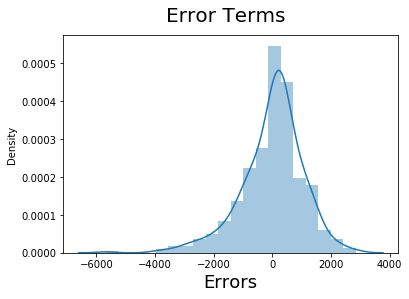

In [127]:
#Residual Analysis of the train data
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

In [177]:
#Dividing into X_test and y_test
X_test = y_test

In [179]:
# Creating X_test_new dataframe by dropping variables from X_test
x_test_new = x_test[x_train.columns]

In [186]:
# Adding a constant variable 
x_test = sm.add_constant(x_test)

In [188]:
#Making Predictions
num_vars=['instant', 'temp']
y_test[num_vars]= scaler.transform(y_test[num_vars])

In [189]:
# Adding a constant variable 
x_test_new = sm.add_constant(x_test_new)

Text(0, 0.5, 'Predictions')

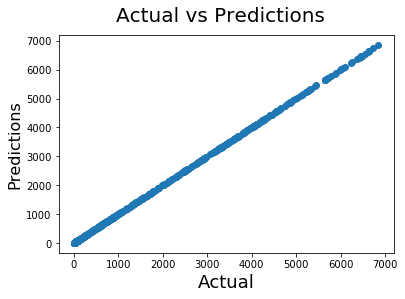

In [191]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test)
fig.suptitle('Actual vs Predictions', fontsize=20)               
plt.xlabel('Actual', fontsize=18)                          
plt.ylabel('Predictions', fontsize=16)    

In [192]:
r2_score(y_test, y_test)

1.0